# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

#Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement. The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

[Companies often analyze user responses to two variants of a product to decide which of the two variants is more effective. This experimental technique, known as A/B testing, is used to determine whether a new feature attracts users based on a chosen metric.]

##Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

- Do the users spend more time on the new landing page than on the existing landing page?
- Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
- Does the converted status depend on the preferred language?
- Is the time spent on the new page the same for the different language users?
 

###Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

- **user_id** - Unique user ID of the person visiting the website
- **group** - Whether the user belongs to the first group (control) or the second group (treatment)
- **landing_page** - Whether the landing page is new or old
- **time_spent_on_the_page** - Time (in minutes) spent by the user on the landing page
- **converted** - Whether the user gets converted to a subscriber of the news portal or not
- **language_preferred** - Language chosen by the user to view the landing page

####Bibliography
- *Problem Statement - E-news Express Project.* (2023). Great Learning. https://olympus.mygreatlearning.com/courses/79844/assignments/331504?module_item_id=2788198

## Import all the necessary libraries

In [2]:
import plotly.io as pio
pio.renderers.default='notebook'

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install plotly
import plotly.express as px
import plotly.figure_factory as ff

# to restrict the float value to 2 decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# To display the graphs
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Reading the Data into a DataFrame

In [3]:
# giving colab access to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# reading the data
data = pd.read_csv('/content/drive/MyDrive/DS&BA @ UTA/Module 2/DataSets/abtest.csv')

In [5]:
# creating a copy of the df
df = data.copy()

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [6]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [7]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [8]:
df.shape

(100, 6)

- There are 100 rows and 6 columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


- There are 2 numerical and 4 categorical values

In [10]:
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

- There are no missing values

In [11]:
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.00,NaN,NaN,NaN,546517.00,52.30,546443.00,546467.75,546492.50,546567.25,546592.00
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.00,NaN,NaN,NaN,5.38,2.38,0.19,3.88,5.42,7.02,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- There are 100 test subjects, of which half correspond to the control group and the other half to the treatment group.
- The average time spent on the landing page was 5.38 minutes with a standard deviation of 2.38.
- Out of 100 people, 54 converted to subscribers.



We know that the control group corresponds to those who accessed the old landing page and vice versa, meaning that both variables act the same and give out the same information. Because of this, we only need to analyze one.


In [12]:
df.drop('group', axis=1)

,user_id,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,old,3.48,no,Spanish
1,546468,new,7.13,yes,English
2,546462,new,4.40,no,Spanish
3,546567,old,3.02,no,French
4,546459,new,4.75,yes,Spanish
...,...,...,...,...,...
95,546446,new,5.15,no,Spanish
96,546544,old,6.52,yes,English
97,546472,new,7.07,yes,Spanish
98,546481,new,6.20,yes,Spanish


### Univariate Analysis

Text(0, 0.5, 'Frequency')

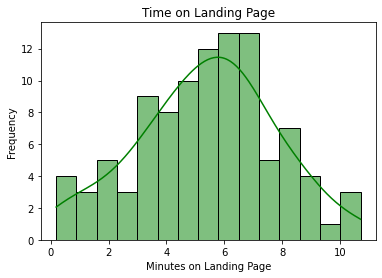

In [13]:
plt.title('Time on Landing Page')
sns.histplot(data=df, x='time_spent_on_the_page', color='green', bins=15, kde=True);
plt.xlabel('Minutes on Landing Page')
plt.ylabel('Frequency')

- The graph seems to approach a normal distribution.
- Most test subjects tended to spend between 5 to 7 minutes on the landing page.


Text(0.5, 0, 'Minutes on Landing Page')

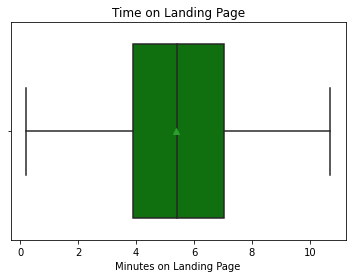

In [66]:
plt.title('Time on Landing Page')
sns.boxplot(data=df, x='time_spent_on_the_page', color='green', showmeans = True);
plt.xlabel('Minutes on Landing Page')

- The median and mean time spent on the landing page is about 5 and a half minutes.
- 25% of people spent less than 4 minutes on the landing page, and 50% spent between 4 to 7 minutes.


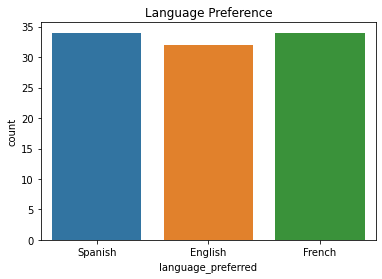

In [15]:
plt.title('Language Preference')
sns.countplot(data=df, x='language_preferred');

In [16]:
df['language_preferred'].value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

- There were 3 preferred languages: Spanish, French, and English, from which Spanish and French had the same preference with 34% of participants from each. English is the lowest only by two points.

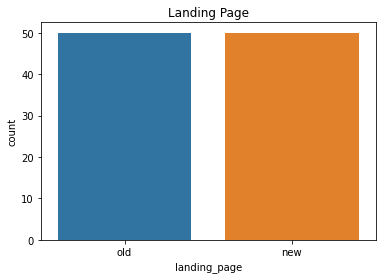

In [17]:
plt.title('Landing Page')
sns.countplot(data=df, x='landing_page');

- The old and new landing pages had the same number of test subjects (50), which means that the analysis done by comparing them will be reliable.


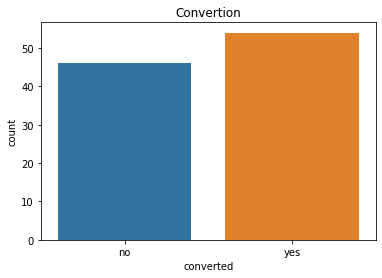

In [18]:
plt.title('Convertion')
sns.countplot(data=df, x='converted');

In [19]:
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

- 54% of test subjects ended up subscribing to E-News.


### Bivariate Analysis

Text(0, 0.5, 'Frequency')

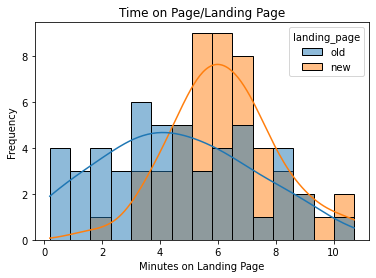

In [20]:
plt.title('Time on Page/Landing Page')
sns.histplot(data=df, x='time_spent_on_the_page', hue='landing_page', bins=15, kde=True);
plt.xlabel('Minutes on Landing Page')
plt.ylabel('Frequency')

- There's a significant increase in the time spent on the new landing page compared to the old one.


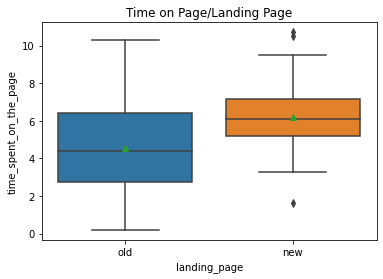

In [67]:
plt.title('Time on Page/Landing Page')
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page', showmeans = True) ;

- The median time spent on the new landing page is around 6 minutes. A little bit more than a minute higher than the median from the old page.
- Theres a couple of outliers for the new landing page but can be considered normal since the values don't stretch out too far from the rest and can be possible for people to have spent that amount of time on the page.
- 50% of the test subjects from the new landing page spent between 5 to 7 minutes, and 50% of those from the old page spent between 3 to 6.5 minutes.


Text(0, 0.5, 'Frequency')

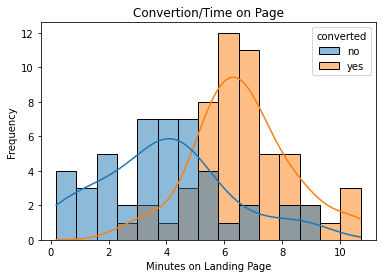

In [22]:
plt.title('Convertion/Time on Page')
sns.histplot(data=df, x='time_spent_on_the_page', hue='converted', bins=15, kde=True);
plt.xlabel('Minutes on Landing Page')
plt.ylabel('Frequency')

- Those who stayed more time on the page, tended to have a higher chance to subscribe.

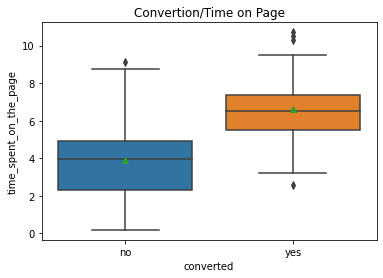

In [68]:
plt.title('Convertion/Time on Page')
sns.boxplot(data=df, x='converted', y='time_spent_on_the_page', showmeans = True) ;

- The median time spent on the landing page for those who subscribed was around 6.5 minutes, which is 2 and a half more minutes than those who didn't.
- 50% of the people who subscribed spent between 5 and a half and 6 and a half minutes on the landing page. Those who didn't spend between 2 and 5 minutes.


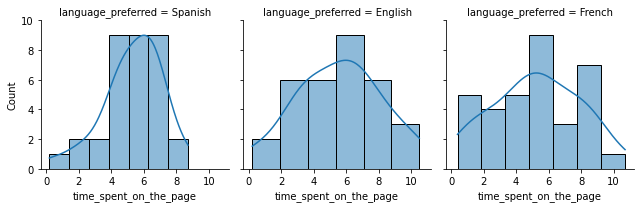

In [24]:
languages = sns.FacetGrid(df, col="language_preferred")
plt.ylim(0,10)
languages.map(sns.histplot, "time_spent_on_the_page", kde=True);

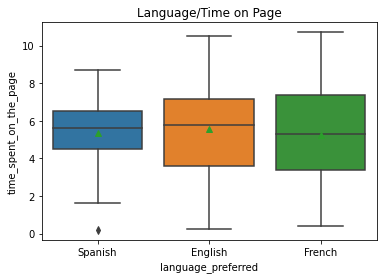

In [69]:
plt.title('Language/Time on Page')
sns.boxplot(data=df, x='language_preferred', y='time_spent_on_the_page', showmeans = True) ;

- 50% of French speakers spent between 3 and 7.3 minutes on the page.
- 50% of Spanish speakers spent between 4.3 and 6.3 minutes on the page.
- 50% of English speakers spent between 3.4 and 7 minutes on the page.


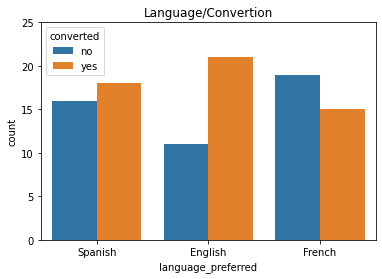

In [26]:
plt.title('Language/Convertion')
plt.ylim(0,25)

sns.countplot(data=df, x='language_preferred', hue='converted');

- English speakers had the highest conversion rate. Around 65% subscribed.
- Around 44% of French speakers subscribe.
- Around 47% of Spanish speakers subscribed.


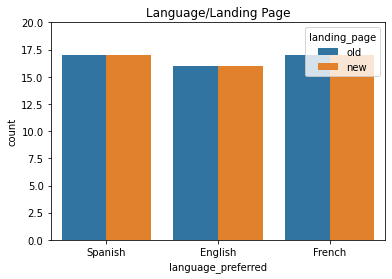

In [27]:
plt.title('Language/Landing Page')
plt.ylim(0,20)
sns.countplot(data=df, x='language_preferred', hue='landing_page');

- Both the old and new landing pages were uniformly distributed between the three languages.

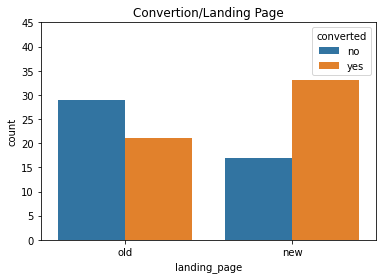

In [28]:
plt.title('Convertion/Landing Page')
plt.ylim(0,45)
sns.countplot(data=df, x='landing_page', hue='converted');

-  Only 40% of people who saw the old landing page ended up converting.
- 66% of people who saw the new landing page ended up converting.

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

Text(0, 0.5, 'Frequency')

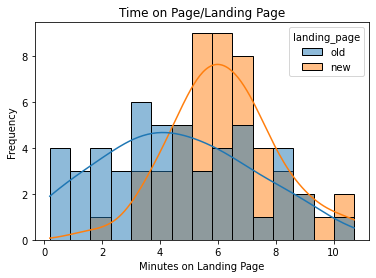

In [29]:
plt.title('Time on Page/Landing Page')
sns.histplot(data=df, x='time_spent_on_the_page', hue='landing_page', bins=15, kde=True);
plt.xlabel('Minutes on Landing Page')
plt.ylabel('Frequency')

### Step 1: Define the null and alternate hypotheses

####Let $\mu_1$ be the new landing page and $\mu_2$ the old page. 


We will test the null hypothesis

>$H_0:\mu_1 = \mu_2$

against the alternate hypothesis

>$H_a:\mu_1 > \mu_2$

### Step 2: Select Appropriate test

### Let's look at the data characteristics 

* Continuous data
* Normally distributed populations
* Independent populations
* Unknown population standard deviations
* Random sampling from the population

**We can then use the T-test for equality of means for two independent samples.**

### Step 3: Decide the significance level

The problem statement declares **α = 0.05**

### Step 4: Collect and prepare data

In [30]:
# separating data from both pages
new_t = df[df['landing_page'] == 'new']['time_spent_on_the_page']
old_t = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [31]:
print('The average time spent on the new landing page is', round(new_t.mean(),2))
print('The average time spent on the old landing page is', round(old_t.mean(),2))
print('The standard deviation of time spent on the new landing page is', round(new_t.std(),2))
print('The standard deviation of time spent on the old landing page is', round(old_t.std(),2))

The average time spent on the new landing page is 6.22
The average time spent on the old landing page is 4.53
The standard deviation of time spent on the new landing page is 1.82
The standard deviation of time spent on the old landing page is 2.58


### Step 5: Calculate the p-value

In [32]:
from scipy.stats import ttest_ind

test_stat, p_value = ttest_ind(new_t, old_t, equal_var = False, alternative = 'greater')
print('The p-value is ', p_value)

The p-value is  0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [33]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Because the p-value (0.0013) is less than the level of significance (0.05), we can reject the null hypothesis. Hence, we have enough evidence to say that users spent more time on the new landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

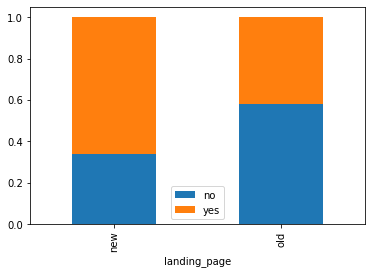

In [37]:
# computing a frequency table to compare the convertion rate
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar",stacked=True)
# normalize = Normalize by dividing all values by the sum of values. Index = applied over each row
plt.legend()
plt.show()

We will test the null hypothesis

>$H_0:p_1 =p_2$

against the alternate hypothesis

>$H_a:p_1 > p_2$

### Let's look at the data characteristics 

* Binomally distributed population
* Independent populations
* Random sampling from the population

**We can then use the two proportion Z-test.**

The problem statement declares **α = 0.05** 

In [46]:
new_con = df[df['landing_page'] == 'new']['converted'].value_counts()['yes']
print(str(new_con) + ' people from the new page subscribed')
old_con = df[df['landing_page'] == 'old']['converted'].value_counts()['yes']
print(str(old_con) + ' people from the old page subscribed')

33 people from the new page subscribed
21 people from the old page subscribed


In [47]:
from statsmodels.stats.proportion import proportions_ztest

# set the counts of convertions for each sample
converted = np.array([33, 21])

# set the sample sizes
nobs = np.array([50, 50])

# find the p-value
test_stat, p_value = proportions_ztest(converted, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


In [48]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.016052616408112556 is less than the level of significance, we reject the null hypothesis.


Because the p-value (0.016) is less than the level of significance (0.05), we can reject the null hypothesis. Hence, we have enough evidence to say that the conversion rate for the new landing page is greater.

## 3. Are the conversion and preferred language independent or related?

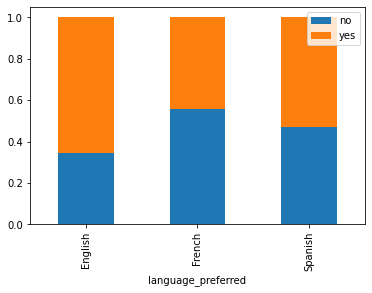

In [50]:
# computing a frequency table 
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", stacked=True)
plt.legend()
plt.show()

We will test the null hypothesis

>$H_0:$ Conversion is independent of preferred language.

against the alternate hypothesis

>$H_a:$ Conversion is dependent of preferred language.

### Let's look at the data characteristics 

* Categorical variables
* Random sampling from the
population
* Expected value of the number
of sample observations in each
level of the variable is at least 5

**We can then use the  Chi Square Test for Independence.**

The problem statement declares **α = 0.05** 

In [51]:
# create the contingency table 
contingency_table = pd.crosstab(df['language_preferred'],df['converted'])
contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


In [52]:
from scipy.stats import chi2_contingency

chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


In [53]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance, we fail to reject the null hypothesis.


Because the p-value (0.21) is greater than the level of significance (0.05), we fail to reject the null hypothesis. Hence, we do NOT have enough evidence to say that conversion is pendent of preferred language.

## 4. Is the time spent on the new page same for the different language users?

In [56]:
# isolating data from the new landing page
new = df[df['landing_page'] == 'new']

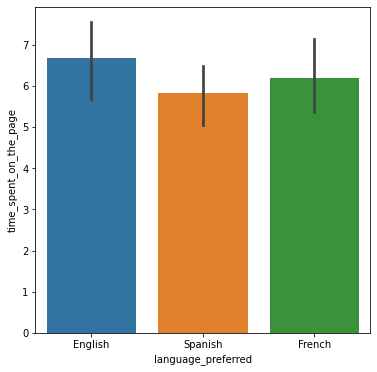

In [70]:
plt.figure(figsize=(6,6))
sns.barplot(data = new, x = 'language_preferred', y = 'time_spent_on_the_page')
plt.show()

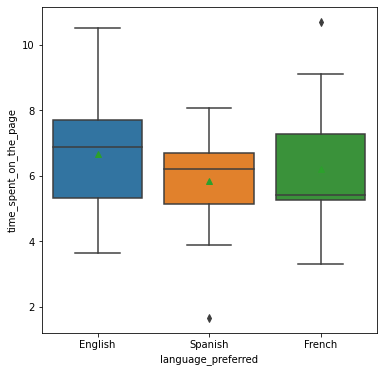

In [64]:
plt.figure(figsize=(6,6))
sns.boxplot(data = new, x = 'language_preferred', y = 'time_spent_on_the_page', showmeans = True)
# showmeans = True enables the means to show on each boxplot
plt.show()

In [73]:
new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English   6.66
French    6.20
Spanish   5.84
Name: time_spent_on_the_page, dtype: float64

We will test the null hypothesis

>$H_0:\mu_1 = \mu_2 = \mu_3$

against the alternate hypothesis

>$H_a:$ At least one language's time on the page is different from the rest.

In [74]:
# Testing for Normality
from scipy import stats

w, p_value = stats.shapiro(new['time_spent_on_the_page'])
print('The p-value is', p_value)

The p-value is 0.8040016293525696


In [78]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis (Normal distribution).')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis (Normal distribution).')

As the p-value 0.8040016293525696 is greater than the level of significance, we fail to reject the null hypothesis (Normal distribution).


In [79]:
# Testing Homogeneity of Variance
from scipy.stats import levene
statistic, p_value = levene( new['time_spent_on_the_page'][new['language_preferred']=="Spanish"],
                            new['time_spent_on_the_page'][new['language_preferred']=="English"],
                            new['time_spent_on_the_page'][new['language_preferred']=="French"])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


In [80]:
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis. Meaning al variances are equal')

As the p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis. Meaning al variances are equal


### Let's look at the data characteristics 

* The populations are normally distributed
* Samples are independent
* Simple random samples
* Population variances are equal

**We can then use the  Chi Square Test for Independence.**

The problem statement declares **α = 0.05** 

In [81]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway( new['time_spent_on_the_page'][new['language_preferred']=="Spanish"],
                            new['time_spent_on_the_page'][new['language_preferred']=="English"],
                            new['time_spent_on_the_page'][new['language_preferred']=="French"])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


Because the p-value (0.43) is greater than the level of significance (0.05), we fail to reject the null hypothesis. Hence, we do NOT have enough evidence to say that the time spent on the new page is equal among all languages.

## Conclusion and Business Recommendations

- The median and mean time spent on the landing page is about 5 and a half minutes.
- 25% of people spent less than 4 minutes on the landing page, and 50% spent between 4 to 7 minutes.
- 54% of test subjects ended up subscribing to E-News.
- The median time spent on the new landing page is around 6 minutes. A little bit more than a minute higher than the median from the old page.
- Theres a couple of outliers for the new landing page but can be considered normal since the values don't stretch out too far from the rest and can be possible for people to have spent that amount of time on the page.
- 50% of the test subjects from the new landing page spent between 5 to 7 minutes, and 50% of those from the old page spent between 3 to 6.5 minutes.
- The median time spent on the landing page for those who subscribed was around 6.5 minutes, which is 2 and a half more minutes than those who didn't.
- 50% of the people who subscribed spent between 5 and a half and 6 and a half minutes on the landing page. Those who didn't spend between 2 and 5 minutes.
- 50% of French speakers spent between 3 and 7.3 minutes on the page.
- 50% of Spanish speakers spent between 4.3 and 6.3 minutes on the page.
- 50% of English speakers spent between 3.4 and 7 minutes on the page.
- English speakers had the highest conversion rate. Around 65% subscribed.
- Around 44% of French speakers subscribe.
- Around 47% of Spanish speakers subscribed.
- Only 40% of people who saw the old landing page ended up converting.
- 66% of people who saw the new landing page ended up converting.
- From the sample data, we can conclude that the new landing page is significantly more successful at captivating users’ attention and increasing the conversion rate.
- There was enough statistical evidence to say that the conversion rate is dependent on preffered language.
- There also seems to be a dependent correlation between time spent on the page and preffered language.

###Recommendation

- There should be further editing for the new landing page presented on Spanish and French.
- More research should be done in order to understand the variables that affect a person's decision to convert.

___